In [1]:
import pandas as pd
import numpy as np

from create_dataframe import *
from bidding_zones import BIDDING_ZONES_CWE

In [2]:
df_scheduled_exchanges = create_dataframe_scheduled_exchanges(countries_scheduled_exchanges=list(BIDDING_ZONES_CWE.keys()))
df_residual_load = create_dataframe_residual_load(countries_load=list(BIDDING_ZONES_CWE.keys()))
df_day_ahead_prices = create_dataframe_day_ahead_prices(countries_day_ahead_prices=list(BIDDING_ZONES_CWE.keys()))

Finished scheduled exchanges
Finished residual loads
Finished day ahead prices


In [3]:
#df_scheduled_exchanges.columns
#df_residual_load.columns
df_day_ahead_prices.columns

Index(['day_ahead_prices_AT', 'day_ahead_prices_BE', 'day_ahead_prices_FR',
       'day_ahead_prices_DE_AT_LU', 'day_ahead_prices_DE_LU',
       'day_ahead_prices_NL', 'mean_price', 'price_spread_total',
       'price_spread_AT', 'SDM_AT', 'price_spread_BE', 'SDM_BE',
       'price_spread_FR', 'SDM_FR', 'price_spread_DE_AT_LU', 'SDM_DE_AT_LU',
       'price_spread_DE_LU', 'SDM_DE_LU', 'price_spread_NL', 'SDM_NL',
       'relative_price_spread'],
      dtype='object')

In [4]:
"Machine learning modules"
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from sklearn.cluster import KMeans

In [5]:
df_total2 = pd.DataFrame()

df_total2 = pd.concat([df_scheduled_exchanges, df_residual_load, df_day_ahead_prices], axis=1)

df_total2 = df_total2.fillna(0)

In [6]:
#print(df_total2)
#df_total2.dtypes
#df_total2.columns

In [7]:
modelLR2 = LinearRegression()
modelLR2.fit(df_total2[['scheduled_exchanges_AT_DE_LU',
       'scheduled_exchanges_BE_FR', 'scheduled_exchanges_BE_DE_LU',
       'scheduled_exchanges_BE_NL', 'scheduled_exchanges_FR_BE',
       'scheduled_exchanges_FR_DE_AT_LU', 'scheduled_exchanges_FR_DE_LU',
       'scheduled_exchanges_DE_AT_LU_FR', 'scheduled_exchanges_DE_AT_LU_NL',
       'scheduled_exchanges_DE_LU_AT', 'scheduled_exchanges_DE_LU_BE',
       'scheduled_exchanges_DE_LU_FR', 'scheduled_exchanges_DE_LU_NL',
       'scheduled_exchanges_NL_BE', 'scheduled_exchanges_NL_DE_AT_LU',
       'scheduled_exchanges_NL_DE_LU']],df_total2['price_spread_total'])

LinearRegression()

In [8]:
df5=['scheduled_exchanges_AT_DE_LU',
       'scheduled_exchanges_BE_FR', 'scheduled_exchanges_BE_DE_LU',
       'scheduled_exchanges_BE_NL', 'scheduled_exchanges_FR_BE',
       'scheduled_exchanges_FR_DE_AT_LU', 'scheduled_exchanges_FR_DE_LU',
       'scheduled_exchanges_DE_AT_LU_FR', 'scheduled_exchanges_DE_AT_LU_NL',
       'scheduled_exchanges_DE_LU_AT', 'scheduled_exchanges_DE_LU_BE',
       'scheduled_exchanges_DE_LU_FR', 'scheduled_exchanges_DE_LU_NL',
       'scheduled_exchanges_NL_BE', 'scheduled_exchanges_NL_DE_AT_LU',
       'scheduled_exchanges_NL_DE_LU']


df6=pd.DataFrame()

df6["Name"] = df5
df6["Coef"] = modelLR2.coef_
print(df6)

                               Name      Coef
0      scheduled_exchanges_AT_DE_LU -0.000836
1         scheduled_exchanges_BE_FR  0.003746
2      scheduled_exchanges_BE_DE_LU  0.000983
3         scheduled_exchanges_BE_NL -0.000769
4         scheduled_exchanges_FR_BE  0.002705
5   scheduled_exchanges_FR_DE_AT_LU -0.002472
6      scheduled_exchanges_FR_DE_LU -0.002376
7   scheduled_exchanges_DE_AT_LU_FR  0.003522
8   scheduled_exchanges_DE_AT_LU_NL  0.002286
9      scheduled_exchanges_DE_LU_AT  0.003553
10     scheduled_exchanges_DE_LU_BE  0.003783
11     scheduled_exchanges_DE_LU_FR  0.001697
12     scheduled_exchanges_DE_LU_NL  0.000376
13        scheduled_exchanges_NL_BE -0.000290
14  scheduled_exchanges_NL_DE_AT_LU  0.006046
15     scheduled_exchanges_NL_DE_LU -0.001875


In [9]:
df_total = pd.DataFrame()

df_summed_exchanges = df_scheduled_exchanges.sum(axis=1, skipna=True, numeric_only=True)

df_total = pd.concat([df_summed_exchanges, df_residual_load, df_day_ahead_prices], axis=1)

In [17]:
#print(df_total)

In [11]:
df_total.drop(['SDM_FR', 'SDM_AT', 'SDM_BE', 'SDM_NL', 'SDM_DE_LU', 'SDM_DE_AT_LU'], axis=1, inplace=True)

In [24]:
df_total.rename(columns={df_total.columns[0]: "sum_exchanges"}, inplace=True)
#print(df_total)

df_total = df_total.fillna(0)
#print(df_total)
df_total.columns

Index(['sum_exchanges', 'load_AT', 'non_dispatchable_AT', 'residual_load_AT',
       'load_BE', 'non_dispatchable_BE', 'residual_load_BE', 'load_FR',
       'non_dispatchable_FR', 'residual_load_FR', 'load_DE_AT_LU',
       'non_dispatchable_DE_AT_LU', 'residual_load_DE_AT_LU', 'load_DE_LU',
       'non_dispatchable_DE_LU', 'residual_load_DE_LU', 'load_NL',
       'non_dispatchable_NL', 'residual_load_NL', 'day_ahead_prices_AT',
       'day_ahead_prices_BE', 'day_ahead_prices_FR',
       'day_ahead_prices_DE_AT_LU', 'day_ahead_prices_DE_LU',
       'day_ahead_prices_NL', 'mean_price', 'price_spread_total',
       'price_spread_AT', 'price_spread_BE', 'price_spread_FR',
       'price_spread_DE_AT_LU', 'price_spread_DE_LU', 'price_spread_NL',
       'relative_price_spread'],
      dtype='object')

In [33]:
#df_total.columns
df_total2.columns
#df_total["sum_exchanges"].plot()

Index(['scheduled_exchanges_AT_DE_LU', 'scheduled_exchanges_BE_FR',
       'scheduled_exchanges_BE_DE_LU', 'scheduled_exchanges_BE_NL',
       'scheduled_exchanges_FR_BE', 'scheduled_exchanges_FR_DE_AT_LU',
       'scheduled_exchanges_FR_DE_LU', 'scheduled_exchanges_DE_AT_LU_FR',
       'scheduled_exchanges_DE_AT_LU_NL', 'scheduled_exchanges_DE_LU_AT',
       'scheduled_exchanges_DE_LU_BE', 'scheduled_exchanges_DE_LU_FR',
       'scheduled_exchanges_DE_LU_NL', 'scheduled_exchanges_NL_BE',
       'scheduled_exchanges_NL_DE_AT_LU', 'scheduled_exchanges_NL_DE_LU',
       'load_AT', 'non_dispatchable_AT', 'residual_load_AT', 'load_BE',
       'non_dispatchable_BE', 'residual_load_BE', 'load_FR',
       'non_dispatchable_FR', 'residual_load_FR', 'load_DE_AT_LU',
       'non_dispatchable_DE_AT_LU', 'residual_load_DE_AT_LU', 'load_DE_LU',
       'non_dispatchable_DE_LU', 'residual_load_DE_LU', 'load_NL',
       'non_dispatchable_NL', 'residual_load_NL', 'day_ahead_prices_AT',
       'day_ahea

In [34]:
modelLR3 = LinearRegression()
modelLR3.fit(df_total2[['residual_load_AT',
       'residual_load_BE', 'residual_load_FR',
       'residual_load_DE_AT_LU', 'residual_load_DE_LU',
       'residual_load_NL']],df_total['sum_exchanges'])


df8=['residual_load_AT',
       'residual_load_BE', 'residual_load_FR',
       'residual_load_DE_AT_LU', 'residual_load_DE_LU',
       'residual_load_NL']


In [36]:
df9=pd.DataFrame()

df9["Name"] = df8
df9["Coef"] = modelLR3.coef_
print(df9)

                     Name      Coef
0        residual_load_AT  0.066612
1        residual_load_BE -0.174653
2        residual_load_FR  0.143952
3  residual_load_DE_AT_LU -0.002468
4     residual_load_DE_LU  0.016581
5        residual_load_NL -0.024605


<AxesSubplot:>

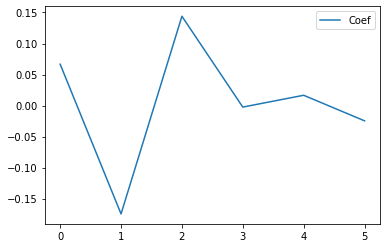

In [14]:
modelLR = LinearRegression()
modelLR.fit(df1[['day_ahead_prices_BE', 
       'day_ahead_prices_FR',
       'day_ahead_prices_DE_AT_LU', 
       'day_ahead_prices_DE_LU',
       'day_ahead_prices_NL']],df1['sum_exchanges'])
#df1.columns


LinearRegression()

In [15]:

DAP=['day_ahead_prices_BE',
       'day_ahead_prices_FR',
       'day_ahead_prices_DE_AT_LU', 
       'day_ahead_prices_DE_LU',
       'day_ahead_prices_NL']


df2=pd.DataFrame()

print(df2)

df2["Name"] = DAP
df2["Coef"] = modelLR.coef_
print(df2)

Empty DataFrame
Columns: []
Index: []
                        Name        Coef
0        day_ahead_prices_BE   -5.784297
1        day_ahead_prices_FR  -24.815780
2  day_ahead_prices_DE_AT_LU   44.108018
3     day_ahead_prices_DE_LU   -3.906442
4        day_ahead_prices_NL  116.863951


In [16]:
#print(df1)
#df1.describe()
